In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [13]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.shape


(500, 9)

In [16]:
df.drop(columns = ['Serial No.'],inplace=True)

In [24]:
# Split the dataset into features (X) and target (y)

# 'x' will contain all rows and all columns except the last one
# This is usually used to extract the input features for a machine learning model
x = df.iloc[:, 0:-1]  # selects all rows, columns from index 0 up to (but not including) the last column

# 'y' is intended to store the target/output variable
# However, df.iloc[:] just selects the entire DataFrame, which is not typical for y
# If we want y to be the target column (usually the last column), use the line below instead:
y = df.iloc[:, -1]    # selects all rows of the last column (the target variable)

# Now, 'x' contains the features and 'y' contains the target variable


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [27]:
#building ANN ARCHITECTURE
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


2025-05-22 06:58:00.581560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747897080.878610      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747897080.963898      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [40]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


In [41]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss = 'mean_squared_error',optimizer='Adam')


In [44]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.5467 - val_loss: 0.5659
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5135 - val_loss: 0.5505
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5087 - val_loss: 0.5356
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4848 - val_loss: 0.5194
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4675 - val_loss: 0.4976
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4484 - val_loss: 0.4724
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4163 - val_loss: 0.4418
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3831 - val_loss: 0.3937
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3395 - val_loss: 0.3374
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2856 - val_loss: 0.2779
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2414 - val_loss: 0.2186
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

In [46]:
# Predict target values using the trained model on the scaled test data
y_pred = model.predict(x_test_scaled)

# -----------------------------------
# Why do we need to scale the data?
# -----------------------------------
# Many machine learning algorithms (especially those based on gradient descent, SVM, KNN, and linear regression)
# are sensitive to the scale of input features.
# If features have different units or magnitudes (e.g., age vs. income),
# the model may give more weight to higher-magnitude features.
# Scaling (e.g., StandardScaler) ensures that all features contribute equally by transforming them to have zero mean and unit variance.

# -----------------------------------
# Evaluate model performance using R² Score (coefficient of determination)
# -----------------------------------
# R² (R-squared) measures how well the predicted values approximate the actual data.
# It is defined as:
#     R² = 1 - (Sum of squared residuals / Total sum of squares)
#
# Meaning of R²:
# - R² = 1.0 → Perfect prediction (100% of variance explained)
# - R² = 0.0 → Predictions are no better than simply predicting the mean
# - R² < 0   → Model performs worse than the mean (bad fit)
#
# In short, R² indicates the proportion of variance in the target variable that can be explained by the model.
# Higher R² means better model performance (but beware of overfitting on training data).

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


0.7621594765842864

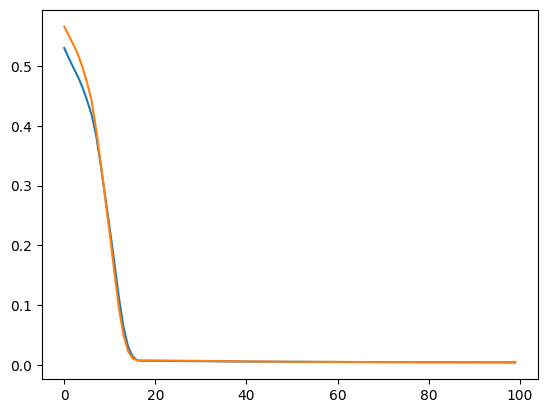

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])